Solving and analyzing the Lotka-Volterra Equations for a population of prey and predators (antelopes and cheetahs) coexisting in a controlled environment, using computational efforts in Scientific Python.

In [2]:
# The first step is to import the libraries and define the community conventions

import numpy as np
import matplotlib.pyplot as matplt
from scipy.integrate import odeint
%matplotlib inline

In [3]:
# For simplicity in the results, maintaining the coexistence of the species, the growth and decrease parameters were defined

a=1;
b=1;
c=1;
d=1;

def lotkavolterra(F,t):
    
    # Function that will return the values of the derivatives in a two-dimensional array
    
    x = F[0]; # Antelopes
    y = F[1]; # Cheetahs
    dxdt = a*x - b*x*y # Equation 1
    dydt = d*x*y - c*y # Equation 2
    return np.array([dxdt,dydt])

In [4]:
#   Once the procedure has been carried out, the minimum and maximum analysis time,
#   the integration step and the desired initial conditions must be defined.

h = 0.1;
tmax = 20.0;
tmin = 0.0;
ci = (1.0,1.5);
n = int((tmax-tmin)/h);
time = np.linspace(tmin, tmax, n+1);

In [5]:
#   Calling “odeint”, which will return a two-dimensional array, the first column referring
#   to the antelopes and the second column to the cheetahs, for the function “lotkavolterra”

out = odeint(lotkavolterra, ci, time);

Results and Analysis
With the help of matplotlib library, we can observe the results in two ways.

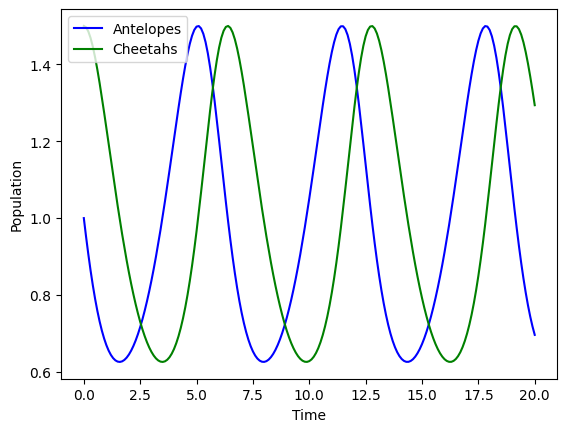

In [6]:
#   The first is when we plot both populations on a graph over time, 
#   where we can clearly see the periodic behavior of the populations.

matplt.plot(time, out[:,0], 'b-', label="Antelopes");
matplt.plot(time, out[:,1], 'g-', label="Cheetahs");
matplt.xlabel("Time");
matplt.ylabel("Population");
matplt.legend();

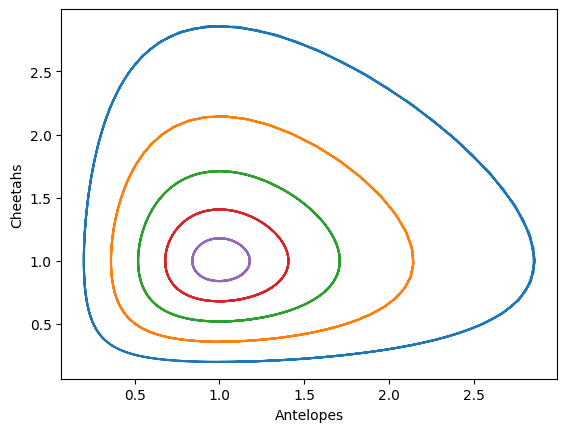

In [8]:
#   In the other way, a phase plan of the species was set up, where we have a graph of predators versus prey,
#   For this, the initial conditions were defined, the number of desired curves and the equations were solved
#   in a for loop, to verify again the periodicity of the populations.

ant = 1.0;
nseries = 6;
guep = np.linspace(0.2, 1, nseries);

for k in range(nseries):
    out = odeint(lotkavolterra, (ant, guep[k]), time)
    matplt.plot(out[:,0], out[:,1]);
    matplt.xlabel("Antelopes");
    matplt.ylabel("Cheetahs");

The equation well illustrated how the species would behave in an isolated environment, but it should be seen as representative,
since several factors influence the behavior of species